In [36]:
t, r, a, b, c, K = var('t r a b c K')
N, P = var('N P')
x1 = function('x1')(t)
x2 = function('x2')(t)


# Define the system of differential equations
Nt = r*N*(1-N/K) - a*N*P
Pt = b*N*P - c*P

dvars = { N: x1, P: x2 }


# Set the parameters
pars = {r: 1/10, a: 1/10, b: 1/10, c: 1/10, K: 10}

In [37]:
vf = [Nt.subs(pars), Pt.subs(pars)]
vf 

[-1/100*(N - 10)*N - 1/10*N*P, 1/10*N*P - 1/10*P]

In [38]:

# Define the system of equations
edo_system = [Nt.subs(dvars).subs(pars), Pt.subs(dvars).subs(pars)]
edo_system

[-1/100*(x1(t) - 10)*x1(t) - 1/10*x1(t)*x2(t), 1/10*x1(t)*x2(t) - 1/10*x2(t)]

In [39]:
# Create a Graphics object
g = Graphics()

# Plot the vector field
vector_field = plot_vector_field(vf, (N, 0, 10), (P, 0, 10), color='gray', headlength=3, headwidth=3)
g += vector_field

In [40]:
# Define a range of initial conditions
initial_conditions = [(Integer(i), Integer(j)) for i in range(0, 11) for j in range(0, 10)]
# initial_conditions

In [41]:
# Solve the system for each initial condition and plot the solution curves
for ic in initial_conditions:
    try:
        sol = desolve_system_rk4(vf, [N, P], ics=[0, ic[0], ic[1]], ivar=t, end_points=10, step=0.1)
        Q = [[j,k]  for i,j,k in sol]
        g+=list_plot(Q, plotjoined=True, color="purple",  alpha=0.5 )+point2d(ic, color='green', pointsize=30)
    except Exception as e:
        print(e)

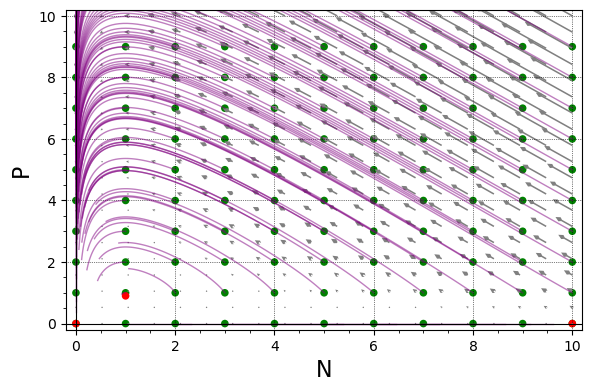

In [42]:
# Plot the critical points
crit_points = solve([Nt==0, Pt==0], N, P)
crit_points_subs = [tuple(map(lambda x: x.subs(pars).rhs(), point)) for point in crit_points]
for point in crit_points_subs:
    g += point2d(point, color='red', pointsize=30)

# Show the plot
g.show(gridlines=True, axes_labels=['N', 'P'], xmin=0, xmax=10, ymin=0, ymax=10)